# [Python for data analysis] - Diabetes Dataset

## Data Exploration 

### Importation of all the librairies that we will use

In [1]:
#pip install missingno

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
plt.style.use('default')

### Importation of the dataset

In [4]:
diabetes_df = pd.read_csv('diabetic_data.csv', sep =',')
diabetes_df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [5]:
diabetes_df['diag_2']

0              ?
1         250.01
2            250
3         250.43
4            157
           ...  
101761       291
101762       276
101763       590
101764       285
101765       530
Name: diag_2, Length: 101766, dtype: object

### First overview

In [6]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_




### Counting unknown values

In [7]:
diabetes_df = diabetes_df.replace('?', np.NaN)

In [8]:
missing_values = diabetes_df.isna().sum() / len(diabetes_df)
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values = missing_values.to_frame()
missing_values

,0
diag_1,0.000206
diag_2,0.003518
diag_3,0.013983
race,0.022336
payer_code,0.395574
medical_specialty,0.490822
weight,0.968585


### Dropping columns with too much missing values

In [9]:
diabetes_df.drop(columns = ['weight', 'medical_specialty', 'payer_code', 'encounter_id'], inplace = True)

### Dropping redundant rows

In [10]:
diabetes_df.drop_duplicates(subset = "patient_nbr", keep = 'first', inplace = True)

In [11]:
diabetes_df.reset_index(inplace = True, drop = True)
diabetes_df

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,...,No,No,No,No,No,No,No,No,No,NO
1,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,...,No,No,No,No,No,No,No,No,Yes,NO
3,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71513,183087545,Caucasian,Female,[70-80),1,1,7,9,50,2,...,No,Steady,No,No,No,No,No,Ch,Yes,>30
71514,188574944,Other,Female,[40-50),1,1,7,14,73,6,...,No,Up,No,No,No,No,No,Ch,Yes,>30
71515,140199494,Other,Female,[60-70),1,1,7,2,46,6,...,No,Steady,No,No,No,No,No,No,Yes,>30
71516,120975314,Caucasian,Female,[80-90),1,1,7,5,76,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO


### Setting the patient number as the index

In [12]:
#diabetes_df.set_index('patient_nbr', inplace = True)

### Rethink some colums format

#### Diag_1, Diag_2, Diag_3: mapping ICD9 codes with corresponding names

https://www.hindawi.com/journals/bmri/2014/781670/tab2/

In [13]:
map_diag_123 = {'Circulatory' : [x for x in range(390,460)]+[785],
                'Respiratory' : [x for x in range(460,519)]+[786],
                'Digestive' : [x for x in range(520,580)]+[787],
                'Diabetes' : list(set(np.linspace(250, 251, 101)) - set([251])),
                'Injury' : [x for x in range(800,1000)],
                'Musculoskeletal' : [x for x in range(710,440)],
                'Genitourinary' : [x for x in range(580,630)]+[788],
                'Neoplasms' : list(set([x for x in range(1,280)] + [780, 781, 782, 784] + [x for x in range(790, 799)] + [x for x in range(680, 709)] + [x for x in range(290, 320)]) - set([250]))}

In [14]:
def mapping_df(diabetes_df, column):
    if diabetes_df[column] is np.NaN :
        return "No data"
    value = str(diabetes_df[column])
    if value[0] == "E" : 
        return "Other"
    elif value[0] == "V" : 
        return "Other"
    else : value = float(diabetes_df[column])
        
    if value in [x for x in range(390,460)]+[785] : return "Circulatory"
    elif value in [x for x in range(460,519)]+[786] : return "Respiratory"
    elif value in [x for x in range(520,580)]+[787] : return "Digestive"
    elif value in list(set(np.linspace(250, 251, 101)) - set([251])) : return "Diabetes"
    elif value in [x for x in range(800,1000)] : return "Injury"
    elif value in [x for x in range(710,740)] : return "Musculoskeletal"
    elif value in [x for x in range(580,630)]+[788] : return "Genitourinary"
    elif value in list(set([x for x in range(1,280)] + [780, 781, 782, 784] + [x for x in range(790, 799)] + [x for x in range(680, 709)] + [x for x in range(290, 320)]) - set([250])) : return "Neoplasms"
    else : return "Other"

In [15]:
diabetes_df['diag_1'] = diabetes_df.apply(mapping_df, axis = 1, column = 'diag_1')
diabetes_df['diag_2'] = diabetes_df.apply(mapping_df, axis = 1, column = 'diag_2')
diabetes_df['diag_3'] = diabetes_df.apply(mapping_df, axis = 1, column = 'diag_3')

In [16]:
def value_exists(column1, column2, column3, diagnosis):
    value = []
    for i in range(len(column1)):
        if str(column1[i]) == diagnosis or str(column2[i]) == diagnosis or str(column3[i]) == diagnosis:
            value.append(True)
        else : value.append(False)
    return value

In [17]:
for diag in map_diag_123.keys():
    name = "Diag_" + str(diag)
    diabetes_df[name] = pd.Series(value_exists(diabetes_df['diag_1'], 
                                               diabetes_df['diag_2'], 
                                               diabetes_df['diag_3'], diag))
    

In [18]:
diabetes_df.Diag_Circulatory

0        False
1        False
2        False
3         True
4        False
         ...  
71513    False
71514    False
71515     True
71516    False
71517    False
Name: Diag_Circulatory, Length: 71518, dtype: bool

## Data Visualization

### Correlation Matrix

In [19]:
corr = diabetes_df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,Diag_Circulatory,Diag_Respiratory,Diag_Digestive,Diag_Diabetes,Diag_Injury,Diag_Musculoskeletal,Diag_Genitourinary,Diag_Neoplasms
patient_nbr,1.00,-0.01,-0.14,-0.02,-0.02,0.01,-0.02,0.02,0.09,0.06,0.09,0.23,-0.02,0.01,0.01,-0.10,0.02,0.00,0.05,0.02
admission_type_id,-0.01,1.00,0.09,0.12,-0.02,-0.12,0.13,0.10,0.04,-0.02,0.04,-0.12,0.01,-0.06,-0.02,0.03,0.01,0.12,-0.04,-0.03
discharge_disposition_id,-0.14,0.09,1.00,0.01,0.16,0.03,0.02,0.11,-0.02,-0.03,-0.02,0.05,0.02,-0.01,-0.06,-0.03,0.07,0.07,0.00,-0.00
admission_source_id,-0.02,0.12,0.01,1.00,0.01,0.09,-0.13,-0.06,0.02,0.06,0.03,0.07,-0.00,0.08,0.05,-0.02,-0.01,-0.12,0.01,0.03
time_in_hospital,-0.02,-0.02,0.16,0.01,1.00,0.33,0.19,0.47,-0.01,-0.01,0.06,0.23,-0.03,0.02,0.01,-0.14,0.05,-0.02,0.05,0.05
num_lab_procedures,0.01,-0.12,0.03,0.09,0.33,1.00,0.05,0.26,-0.01,0.01,0.08,0.16,-0.01,0.05,0.03,-0.07,-0.03,-0.12,0.10,0.04
num_procedures,-0.02,0.13,0.02,-0.13,0.19,0.05,1.00,0.40,-0.02,-0.04,-0.02,0.09,0.15,-0.12,0.00,-0.10,0.08,0.02,-0.05,-0.16
num_medications,0.02,0.10,0.11,-0.06,0.47,0.26,0.40,1.00,0.03,0.00,0.04,0.26,0.09,0.05,-0.05,-0.14,0.09,0.09,0.01,-0.11
number_outpatient,0.09,0.04,-0.02,0.02,-0.01,-0.01,-0.02,0.03,1.00,0.10,0.07,0.08,-0.00,-0.01,-0.00,-0.03,-0.01,0.01,0.02,0.01
number_emergency,0.06,-0.02,-0.03,0.06,-0.01,0.01,-0.04,0.00,0.10,1.00,0.15,0.05,-0.03,0.01,0.01,0.01,-0.01,-0.00,0.01,0.03


<AxesSubplot:>

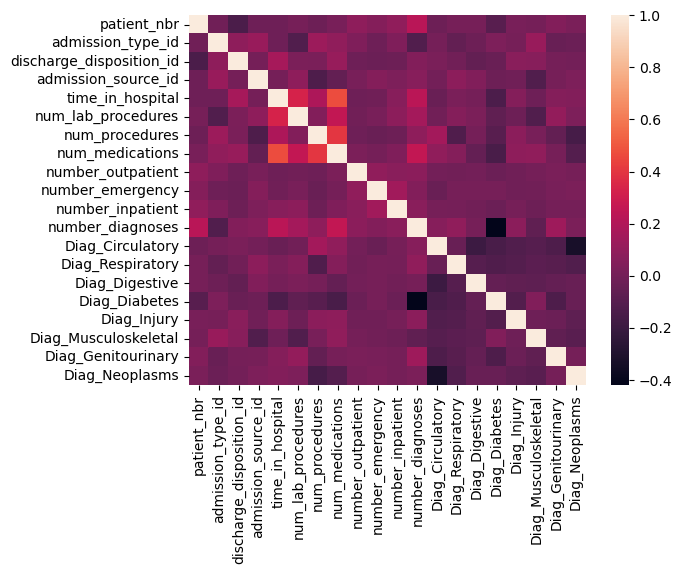

In [20]:
sns.heatmap(diabetes_df.corr())

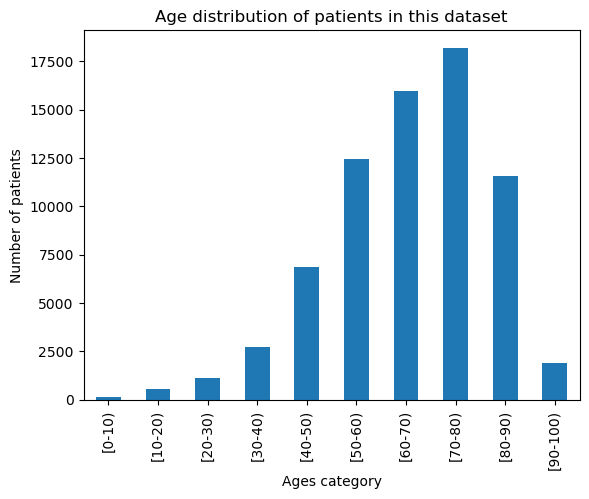

In [21]:
diabetes_df.groupby('age').size().plot(kind='bar')
plt.title('Age distribution of patients in this dataset')
plt.xlabel('Ages category')
plt.ylabel('Number of patients')
plt.savefig("Plots\AgeDistribution.png")

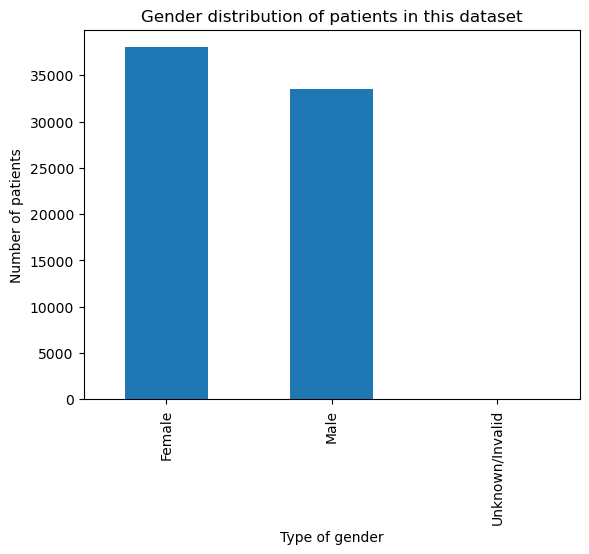

In [22]:
diabetes_df.groupby('gender').size().plot(kind='bar')
plt.title('Gender distribution of patients in this dataset')
plt.xlabel('Type of gender')
plt.ylabel('Number of patients')
plt.savefig("Plots\GenderDistribution.png")

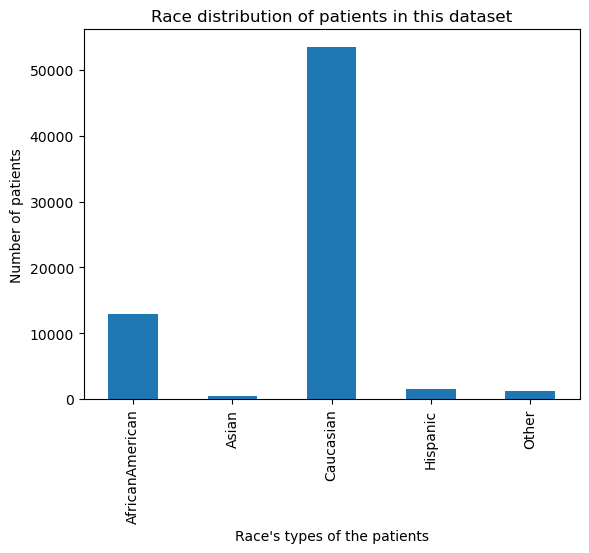

In [23]:
diabetes_df.groupby('race').size().plot(kind='bar')
plt.title('Race distribution of patients in this dataset')
plt.xlabel("Race's types of the patients")
plt.ylabel('Number of patients')
plt.savefig("Plots\RaceDistribution.png")

<AxesSubplot:ylabel='None'>

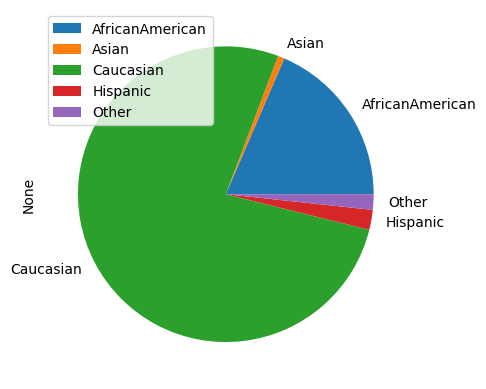

In [24]:
diabetes_df.groupby('race').size().plot(kind='pie', legend = True)